In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [2]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [3]:
df.describe(include='all')

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988,62988,62985,62988.000000,60719,59740,62962,62568.000000,62988,...,62850.000000,62988.000000,62988,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
unique,NaN,3068,3406,2,NaN,3234,1165,118,NaN,1,...,NaN,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1/13/2011,2/16/2013,Male,NaN,guangzhou,guangdong,CN,NaN,3/31/2014,...,NaN,NaN,3/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,184,96,48134,NaN,9386,17509,57748,NaN,62988,...,NaN,NaN,959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,31494.500000,NaN,NaN,NaN,4.102162,NaN,NaN,NaN,42.476346,NaN,...,5604.026014,17123.878691,NaN,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,NaN,NaN,NaN,0.373856,NaN,NaN,NaN,9.885915,NaN,...,8703.364247,20960.844623,NaN,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,6.000000,NaN,...,0.000000,368.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,35.000000,NaN,...,780.000000,4747.000000,NaN,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,41.000000,NaN,...,2773.000000,9994.000000,NaN,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,48.000000,NaN,...,6845.750000,21271.250000,NaN,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [5]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

## Handling missing values

In [6]:
df.duplicated().sum()

0

In [7]:
print('Missing value:',round(df.isna().sum().sum()/df.shape[0]*100,2),'% of total data')

Missing value: 10.57 % of total data


The missing values are bigger than 5% of all data. So we can't just remove all of it. To decide which method will be used to handle missing values, We will check the distribution of features that contain missing values.

<AxesSubplot:xlabel='AGE', ylabel='Count'>

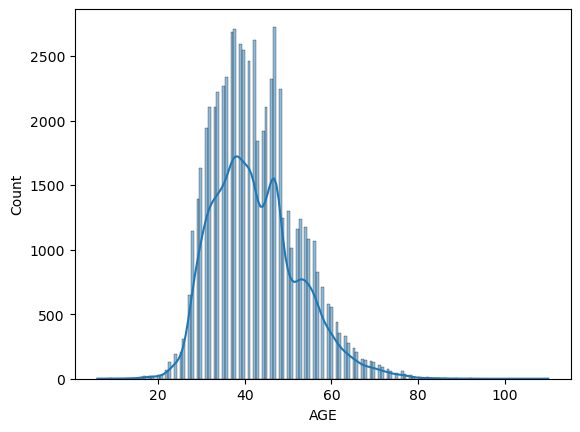

In [8]:
sns.histplot(x=df['AGE'], kde=True)

As we can see the distribution is quite normal. So we will fill the missing values using mean

In [9]:
df['GENDER'].value_counts()

Male      48134
Female    14851
Name: GENDER, dtype: int64

Because male count is higher than female we will fill the missing value with male.

<AxesSubplot:xlabel='SUM_YR_1', ylabel='Count'>

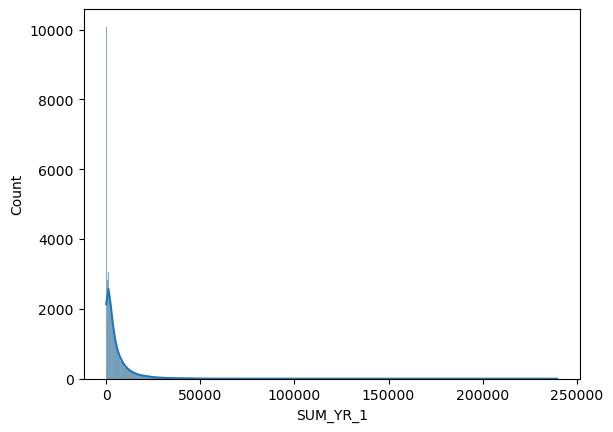

In [10]:
sns.histplot(x=df['SUM_YR_1'], kde=True)

<AxesSubplot:xlabel='SUM_YR_2', ylabel='Count'>

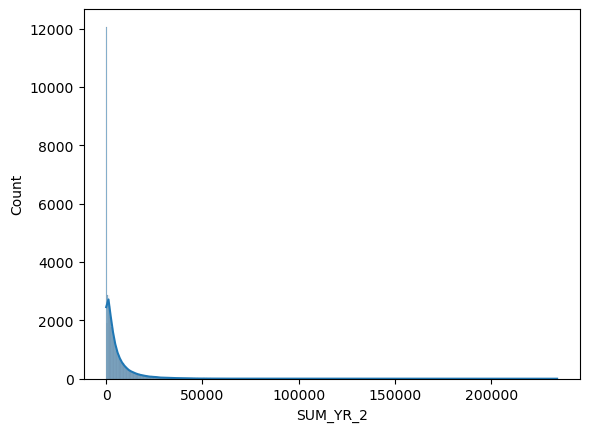

In [11]:
sns.histplot(x=df['SUM_YR_2'], kde=True)

'SUM_YR_1' and 'SUM_YR_2' are positively skewed. So we will try to handle the missing value by fill it with median.

In [12]:
df['GENDER'] = df['GENDER'].fillna('Male')
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

In [13]:
print(df['WORK_COUNTRY'].nunique())
print(df['WORK_PROVINCE'].nunique())
print(df['WORK_CITY'].nunique())

118
1165
3234


In [14]:
df = df.drop(['WORK_COUNTRY','WORK_PROVINCE','WORK_CITY'], axis = 1)

Because the unique value of categorical data is too many, it will be hard to analyze those features so we will decide to drop it.

## Statistical summary

In [15]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5333.022406,5597.823538,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.852900,14.049471,16339.486151,8077.407958,8694.832417,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1020.000000,785.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6524.250000,6826.250000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


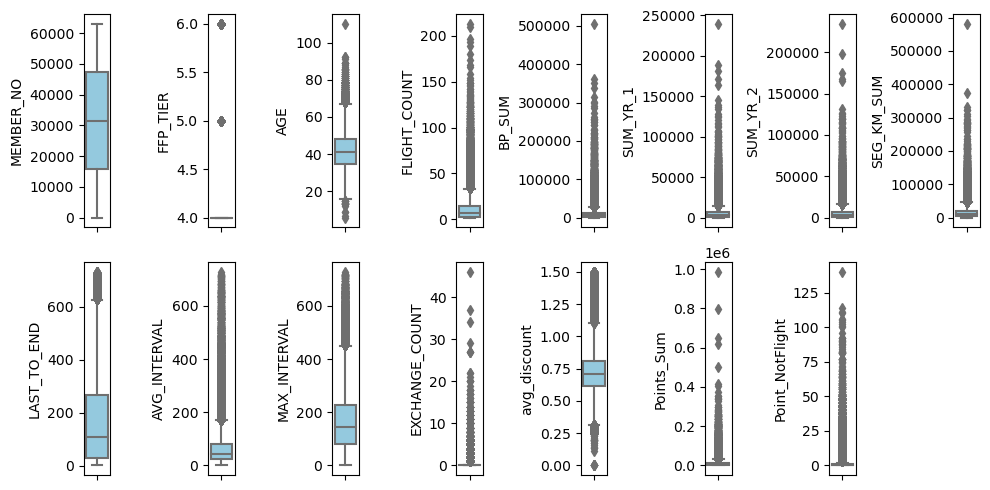

In [16]:
nums = df.select_dtypes(['float64','int64'])
features = nums.columns
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(2, 8, i+1) 
  sns.boxplot(y=df[features[i]], color='skyblue') 
  plt.tight_layout()

We could see there were some customers who hadn't had a flight before. Represented by BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM equal to 0. So we will exclude those customers. Also we will drop any discount bigger than 1.00 because it doesn't make sense to have discount above 100%

In [17]:
df_clean = df[(df['BP_SUM'] > 0) & (df['SUM_YR_1'] > 0) & (df['SUM_YR_2'] > 0) & (df['avg_discount'] <= 1)]

## EDA

<AxesSubplot:xlabel='AGE', ylabel='Count'>

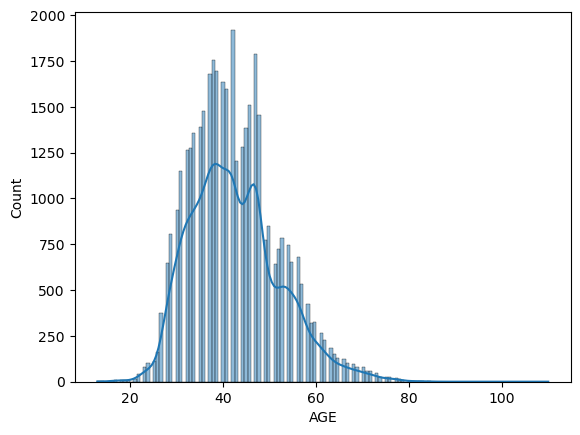

In [18]:
sns.histplot(x=df_clean['AGE'], kde=True)

We could see that the age is centered around 25-50. So we could say that the customer are mostly in their working age.

In [19]:
bins = [0,20,40,60,80,100]
labels = ['0-20','21-40','41-60','61-80','80+']
df_clean['group_age'] = pd.cut(df_clean['AGE'], bins, labels = labels, include_lowest = True)
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


<AxesSubplot:xlabel='group_age', ylabel='Count'>

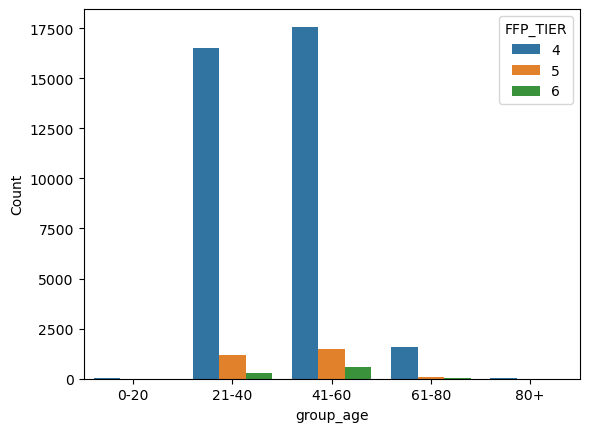

In [20]:
df_age_tier = df_clean.groupby(['group_age','FFP_TIER']).size().reset_index()
df_age_tier = df_age_tier.rename(columns={0:'Count'})
sns.barplot(data=df_age_tier, x='group_age', y='Count', hue='FFP_TIER')

As we can see most people belong on FFP tier 4 and the highest user of FFP tier 6 is on group age of 41-60. The airlines can focus more on advertising FFP tier 4 and FFP tier 6 spesifically for group age of 41-60.

## Feature Selection

According to Tao, Y. (2020). We will use LRFMC analysis. LRFMC analysis is a method used to rank and group customers based on the length of customer relationship, recency, frequency, monetary total of their recent transactions and average discount to identify the best customers and perform targeted marketing campaigns. Recency can be known from 'LAST_TO_END' column. Frecuency can be known from 'FLIGHT_COUNT' column. Monetary can be known from 'SEG_KM_SUM' column. The length of customer relationship can be known by substracting the FPP join date from the date data is taken (LOAD_DATE) and average discount that can be gotten from 'avg_discount' 

In [21]:
df_clean = df_clean.drop(['MEMBER_NO', 'FIRST_FLIGHT_DATE', 'GENDER', 'AGE', 
                          'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'LAST_FLIGHT_DATE',
                          'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 
                          'Points_Sum', 'Point_NotFlight', 'group_age'], axis = 1)

In [22]:
df_clean['LOAD_TIME'] = pd.to_datetime(df_clean['LOAD_TIME'])
df_clean['FFP_DATE'] = pd.to_datetime(df_clean['FFP_DATE'])
df_clean['L'] = df_clean['LOAD_TIME'] - df_clean['FFP_DATE']
df_clean['L'] = df_clean['L'].dt.days.astype('int64')
df_clean.head()

,FFP_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_TO_END,avg_discount,L
0,2006-11-02,6,2014-03-31,210,580717,1,0.961639,2706
4,2009-04-10,6,2014-03-31,152,309928,5,0.970658,1816
5,2008-02-10,6,2014-03-31,92,294585,79,0.967692,2241
6,2006-03-22,6,2014-03-31,101,287042,1,0.965347,2931
7,2010-04-09,6,2014-03-31,73,287230,3,0.962070,1452


In [23]:
df_new = df_clean[[ 'L', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
df_new.columns = ['L', 'R', 'F', 'M', 'C']
df_new.head()

,L,R,F,M,C
0,2706,1,210,580717,0.961639
4,1816,5,152,309928,0.970658
5,2241,79,92,294585,0.967692
6,2931,1,101,287042,0.965347
7,1452,3,73,287230,0.962070


## Outlier Handling

We need to clean outlier so our model could be accurate

In [24]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_new)}')

fil_ent = np.array([True] * len(df_new))
for col in ['L', 'R', 'F', 'M', 'C']:
    Q1 = df_new[col].quantile(0.25)
    Q3 = df_new[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df_new[col] >= low_limit) & (df_new[col] <= high_limit)) & fil_ent
    
df_new = df_new[fil_ent].reset_index()

print('Jumlah baris setelah memfilter outlier', len(df_new))

Jumlah baris sebelum memfilter outlier: 39371
Jumlah baris setelah memfilter outlier 35381


## Feature Scaling

The data has different range for each features so we need to scale the data. The features aren't normally distributed. So we decide to use StandardScaler to scale the data

In [25]:
columns = ['L', 'R', 'F', 'M', 'C']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_new.drop('index', axis=1))
X_std = scaler.transform(df_new.drop('index', axis=1))
df_scaled = pd.DataFrame(data = X_std, columns = columns)
df_scaled.describe()

,L,R,F,M,C
count,3.538100e+04,3.538100e+04,3.538100e+04,3.538100e+04,3.538100e+04
mean,4.966994e-16,4.865862e-15,-4.881203e-16,3.174182e-15,1.173493e-15
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.340573e+00,-1.098212e+00,-1.199705e+00,-1.365768e+00,-2.636830e+00
25%,-8.843987e-01,-8.440656e-01,-8.369687e-01,-7.736026e-01,-6.699012e-01
50%,-2.417160e-01,-3.052746e-01,-2.324089e-01,-2.690481e-01,1.841414e-02
75%,8.143744e-01,6.096536e-01,4.930628e-01,5.354959e-01,6.816736e-01
max,2.308820e+00,2.612330e+00,3.153126e+00,3.400235e+00,2.376112e+00


## Modeling using K-means Clustering

<AxesSubplot:>

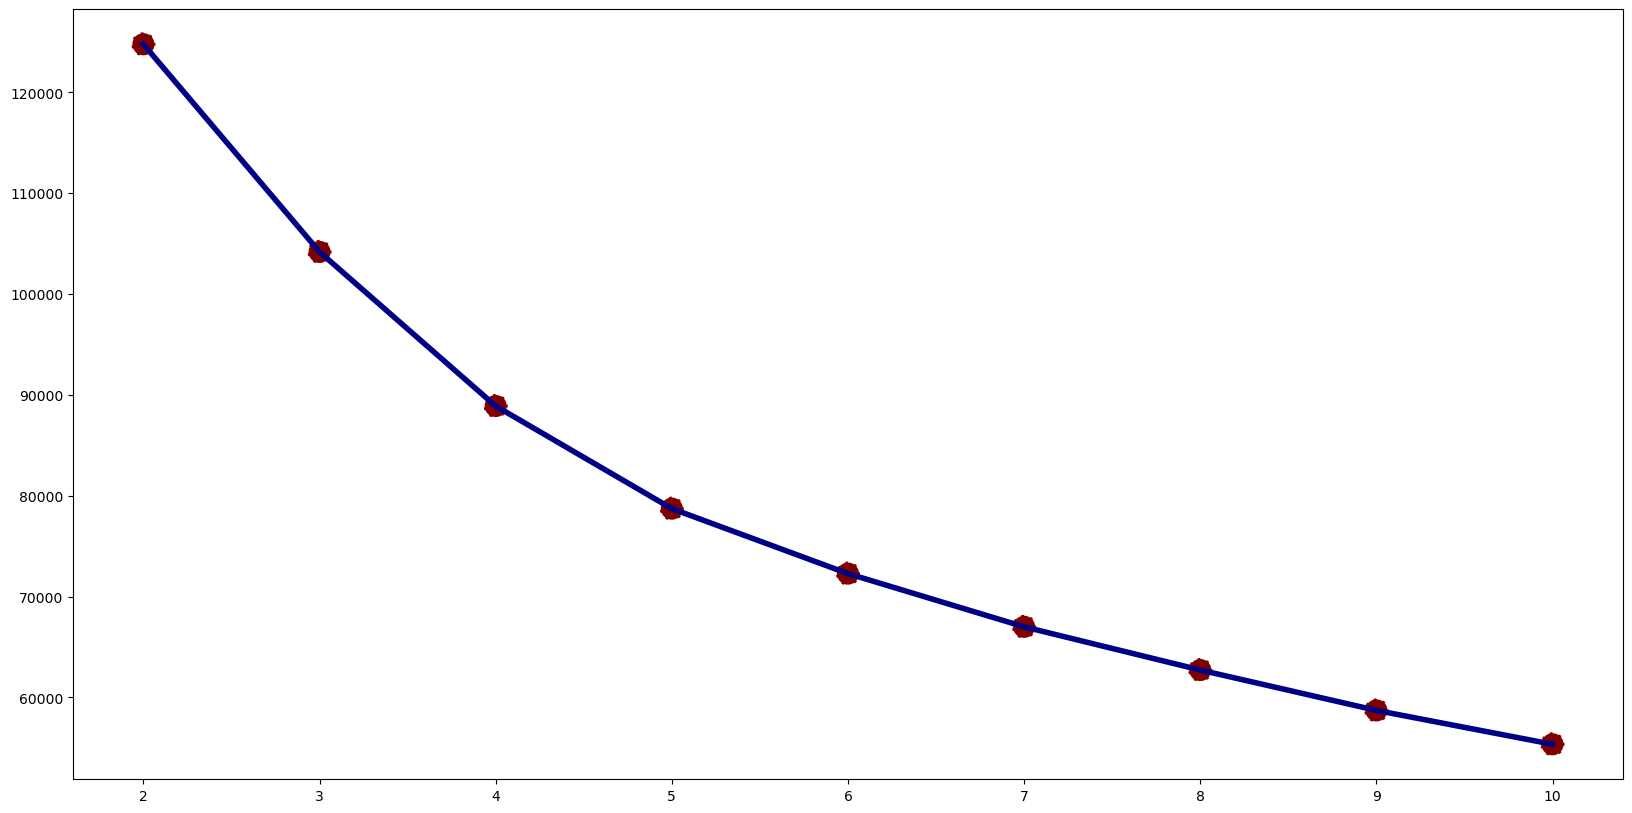

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []

# Iterating the best K for modeling using Elbow method
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

The elbow looked like when the value of K is equal to 4 or 5. For making sure we will use Silhouette method

<AxesSubplot:>

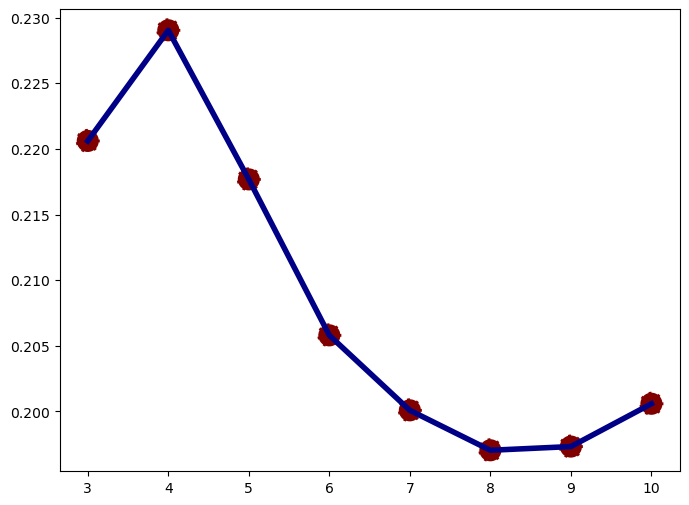

In [27]:
# Iterating the best K for modeling using Silhouette method
arr_silhouette_score_euclidean = []
for i in range(3, 11):
    kmeans = KMeans(n_clusters=i).fit(df_scaled)
    preds = kmeans.predict(df_scaled)
     
    score_euclidean = silhouette_score(df_scaled, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(3,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(3,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

As we can see K = 4 gives as the highest score. So for this data we decide to use K = 4

In [28]:
# Fit the model using K = 4
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_scaled.values)

KMeans(n_clusters=4, random_state=0)

In [29]:
inverse_scale = scaler.inverse_transform(df_scaled)
df_not_scaled = pd.DataFrame(data = inverse_scale, columns = ['L', 'R', 'F', 'M', 'C'])

In [30]:
df_scaled['cluster'] = kmeans.labels_
df_not_scaled['cluster'] = kmeans.labels_

In [31]:
centroid_df = df_scaled.groupby('cluster')[['L', 'R', 'F', 'M', 'C']].agg({'L':'median',
                                                                           'R':'median',
                                                                           'F':'median',
                                                                           'M':'median',
                                                                           'C':'median'}).reset_index()
centroid_df_not_scaled = df_not_scaled.groupby('cluster')[['L', 'R', 'F', 'M', 'C']].agg({'L':'median',
                                                                                          'R':'median',
                                                                                          'F':'median',
                                                                                          'M':'median',
                                                                                          'C':'median'}).reset_index()

## Visualization

In [32]:
# Reduction using PCA for visualization using scatterplot
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_scaled)
pcs = pca.transform(df_scaled)

In [33]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = df_scaled['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,2.555957,0.414615,3
1,4.113904,1.120469,3
2,2.748388,0.001034,3
3,2.300740,1.582438,3
4,4.737576,-0.162930,3


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

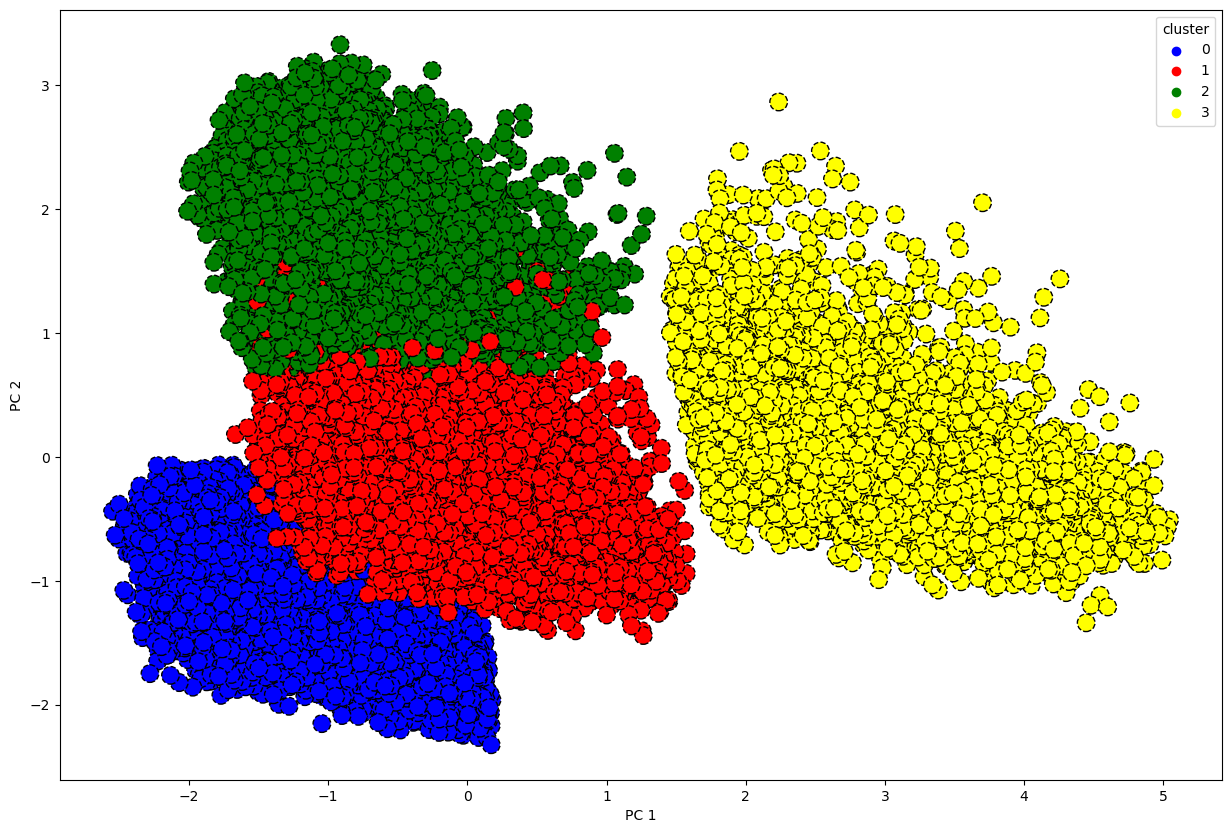

In [34]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','yellow'],
    s=160,
    ax=ax
)

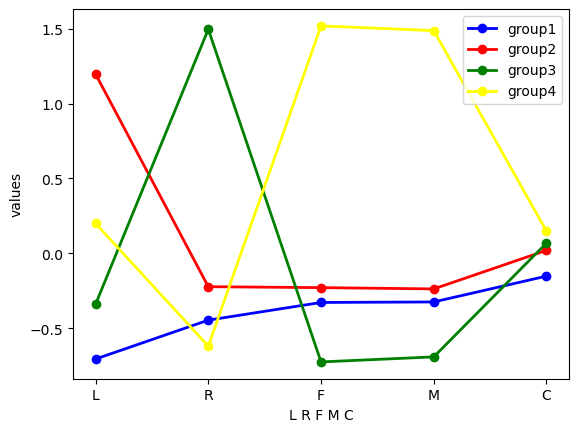

In [35]:
# Visualization using lineplot
x=['L', 'R', 'F', 'M', 'C']
colors=['blue','red','green','yellow']
for i in range(4):
    plt.plot(x,kmeans.cluster_centers_[i],label=('group%d'%(i+1)),linewidth=2,color=colors[i],marker='o')
    plt.legend()
plt.xlabel('L R F M C')
plt.ylabel('values')
plt.show()

## Insight

In [36]:
a = []
for i in range(4):
  a.append(data_pca[data_pca['cluster'] == i].shape[0])

count = pd.DataFrame(np.array(a), columns=['count'])
count

,count
0,11921
1,8013
2,7884
3,7563


In [37]:
centroid_df_not_scaled['cluster'] = centroid_df_not_scaled['cluster']+1
display(pd.concat([centroid_df_not_scaled,count], axis=1))

,cluster,L,R,F,M,C,count
0,1,834.0,56.0,9.0,11906.0,0.687250,11921
1,2,2471.0,75.0,10.0,13211.0,0.706773,8013
2,3,1028.0,254.0,5.0,6973.0,0.714802,7884
3,4,1553.0,27.0,24.0,33357.0,0.718026,7563


After we did clustering, there are four type of customers. 


1.   Group 1: This group consist of 11921 customers. This is a low valued customer. It has low value of all element of LRFMC. For these users, they should be maintained as much as possible, and then stimulate their consumption to stimulate their consumption vitality.
2.   Group 2: This group consist of 8013 customers. Others low except high L. This means these customers have been joining our FFP program for so long but they are not very active. It could mean that they are seasonal reasons or related to promotional activities. For such users, it is necessary to maintain and stimulate consumption as much as possible.
3.   Group 3: This group consist of 7884 customers. R is high while L, F, and M is relatively low. It means this group is a 'new customer' group. We should treat this group with a good care and give them a various offer to make them keep with us.
4.   Group 4: This group consist of 7563 customers. It has moderate value of L and high value of F and M but low value of R. It indicates that they are 'valuable customers' but we also consider consider them as 'lost customers'. we should try to grasp the latest information of these customers, ask them if there was anything that made them uncomfortable when using our airlines so we could fix it. Give them the best offer to make them come back to us.





## Reference



*   Tao, Y. (2020). Analysis Method for Customer Value of Aviation Big Data Based on LRFMC Model. In: Zeng, J., Jing, W., Song, X., Lu, Z. (eds) Data Science. ICPCSEE 2020. Communications in Computer and Information Science, vol 1257. Springer, Singapore.

